In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
model = tf.keras.models.load_model('dog_vs_cat_cnn.h5')

In [2]:
def predict(img):
    imag1 = tf.keras.preprocessing.image.load_img(img, target_size=(256,256))
    imag = tf.keras.preprocessing.image.load_img(img, target_size=(128,128))
    image = tf.keras.preprocessing.image.img_to_array(imag)
    x = np.array(image)/255
    Y_pred = np.array(model(x.reshape(1, 128, 128, 3)))
    if Y_pred[0] > 0.5:
        Y_pred[0] = 1
        Y = 'Dog'
    else:
        Y_pred[0] = 0
        Y = 'Cat'
    print(Y)
    plt.imshow(imag1) 
    plt.title(Y)
    plt.show()

Dog


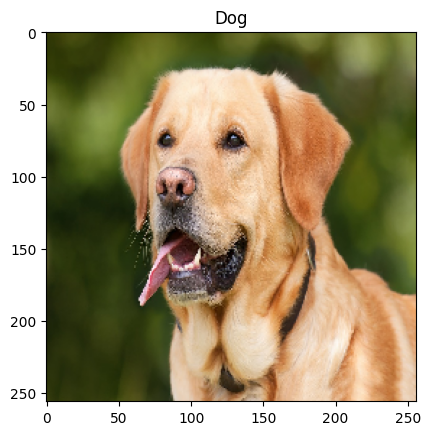

In [3]:
img = 'cat_or_dog_1.jpg'
predict(img)